In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report


In [2]:
data = pd.read_csv("data.csv")
print(data.shape)
data.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

At the last part, there is a unnamed column with full of NaN values.Since we don't need this column, it has to be deleted
Since it doesn't have any reliable data about this cases, ID column is also totally useless so it will be dropped


In [4]:
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.drop(["id"], axis=1,inplace=True)

We should convert the diagnosis categorical to numeric by using Label Encoder

In [5]:
labelencoder = LabelEncoder()
data['diagnosis'] = labelencoder.fit_transform(data['diagnosis'])
data.tail() #unnamed and id columns are deleted diagnosis is encoded

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


We are going to check if is there any missing values in our data.
After that we will check the correlation matrix

In [6]:
print("Number of missing values:" , data.isnull().sum().sum()) #So, there is no missing value in the data
data.corr()

Number of missing values: 0


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


High correlation are more linearly dependent and hence have almost the same effect on the dependent variable.
So, when two features have high correlation, we can drop one of the two features(I will delete if corr>0.90)

In [7]:
data.drop(["perimeter_mean"], axis=1,inplace=True)
data.drop(["area_mean"], axis=1,inplace=True)
data.drop(["radius_worst"], axis=1,inplace=True)
data.drop(["perimeter_worst"], axis=1,inplace=True)
data.drop(["area_worst"], axis=1,inplace=True)
data.drop(["concave points_mean"], axis=1,inplace=True) #It has high correlation with concavity_mean
data.drop(["texture_worst"],axis=1,inplace=True) #it has high corr with texture_mean
data.drop(["radius_se"],axis=1,inplace=True)
data.drop(["perimeter_se"],axis=1,inplace=True)

We have created two different dataset to use them in Clustering Phase (Original:OD and Normalized:ND)
For Classification Phase, it is not recommended to normalize the data before splitting.So we will normalize the data after splitting (It is for Classification algorithm)

In [8]:
OD =data.iloc[:,1:]
OD.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,...,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,...,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,...,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,...,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,...,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
scaler = MinMaxScaler()
ND = pd.DataFrame(scaler.fit_transform(data.iloc[:,1:].values), columns=data.iloc[:,1:].columns, index=data.iloc[:,1:].index)

Let's examine how a few features are clustered:

C:\Users\ereng\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


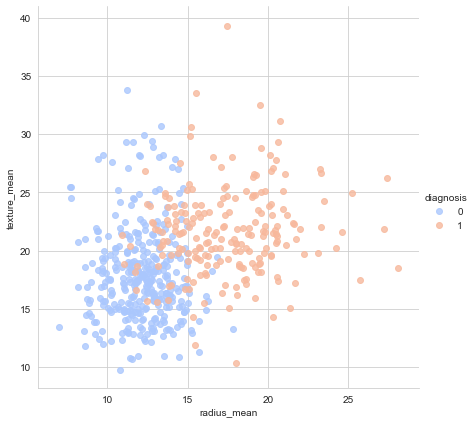

In [10]:
sns.set_style('whitegrid')
sns.lmplot('radius_mean','texture_mean',data=data, hue='diagnosis',palette='coolwarm',size=6,aspect=1,fit_reg=False)

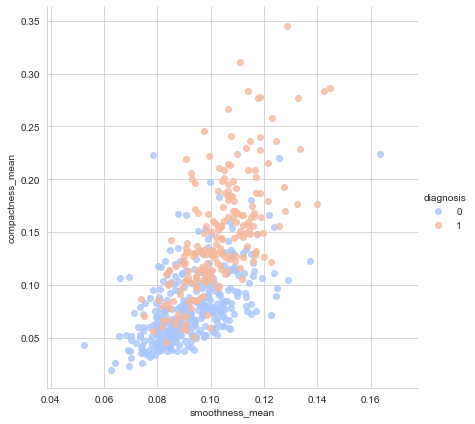

In [11]:
sns.lmplot('smoothness_mean','compactness_mean',data=data, hue='diagnosis',palette='coolwarm',size=6,aspect=1,fit_reg=False)

## KMeans Clustering
We will use KMeans algorithm to Cluster our data. Firstly we are going to use Original Data. In the Second Part we will use Normalized data. In the last section, we will compare the this two different method by using graphs.

In [12]:
from sklearn.cluster import KMeans
originalModel=KMeans(n_clusters = 2, init = 'k-means++',random_state=0) # 2 Label'imiz olduğu için (M,B olarak) cluster sayımızı da iki seçtik
originalModel.fit(OD)
labels = originalModel.predict(OD)
clusterCenters = originalModel.cluster_centers_

In [13]:
ctDf = pd.DataFrame({'labels': labels, 'diagnosis': data["diagnosis"]})
ct = pd.crosstab(ctDf['labels'], ctDf['diagnosis'])
ct

diagnosis,0,1
labels,,
0,357,139
1,0,73


In [14]:
print(originalModel.inertia_) # Inertia is the sum of squared error for each cluster. Ne kadar az o kadar iyidir

551909.8363060172


Inertia means sum of squared errors and it is a common criterion for Clustering. Our aim is minimizing the inertia. Minimized inertia will give better results in Clustering algorithms

# Clustering with normalized Data

In clustering methods, standardization or normalization is very important. We have already normalized our data by using Min-Max Scaling.
"Normalization is used to eliminate redundant data and ensures that good quality clusters are generated which can improve the efficiency of clustering algorithms"

So we're expecting better result by using normalized data

In [15]:
normalizedModel =KMeans(n_clusters = 2, init = 'k-means++',random_state=0)
normalizedModel.fit(ND)
normalizedLabel = normalizedModel.predict(ND)
NclusterCenters = normalizedModel.cluster_centers_

In [16]:
print("Inertia value of Normalized Data: ", normalizedModel.inertia_)
ctDf = pd.DataFrame({'labels': normalizedLabel, 'diagnosis': data["diagnosis"]})
ct = pd.crosstab(ctDf['labels'], ctDf['diagnosis'])
ct

Inertia value of Normalized Data:  150.64855305356213


diagnosis,0,1
labels,,
0,331,42
1,26,170


We can think of Label 0 as Malign and Label 1 as Benign.
After the data was normalized, the inertia value of the model (sum of squared errors) decreased.
As we discussed above, inertia is the sum of squared error for each cluster. Therefore the smaller inertia means better clustering

## Comparison of cluster models:
In this part, we will compare original data distribution against our clustering models.Thus, we will visualize the success of our Clustering models

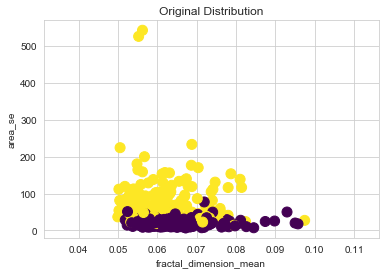

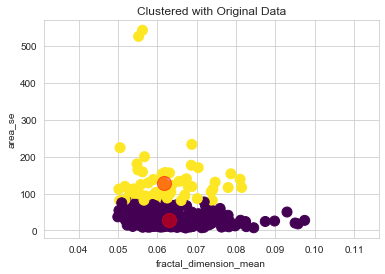

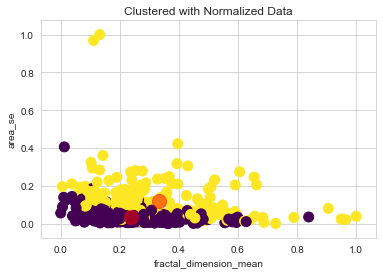

In [17]:
plt.title
plt.scatter(OD["fractal_dimension_mean"], OD["area_se"], c=data["diagnosis"], s=100, cmap='viridis')
plt.title("Original Distribution")
plt.xlabel("fractal_dimension_mean")
plt.ylabel("area_se")
plt.show()

plt.scatter(OD["fractal_dimension_mean"], OD["area_se"], c=labels, s=100, cmap='viridis')
plt.scatter(clusterCenters[:, 6], clusterCenters[:, 8], c='red', s=200, alpha=0.5)
plt.title("Clustered with Original Data")
plt.xlabel("fractal_dimension_mean")
plt.ylabel("area_se")
plt.show()

plt.title
plt.scatter(ND["fractal_dimension_mean"], ND["area_se"], c=normalizedLabel, s=100, cmap='viridis')
plt.scatter(NclusterCenters[:, 6], NclusterCenters[:, 8], c='red', s=200, alpha=0.5)
plt.title("Clustered with Normalized Data")
plt.xlabel("fractal_dimension_mean")
plt.ylabel("area_se")
plt.show()


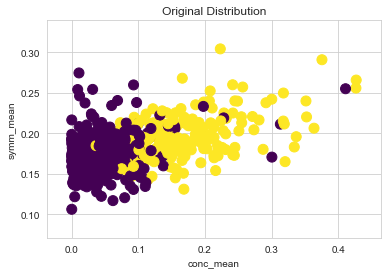

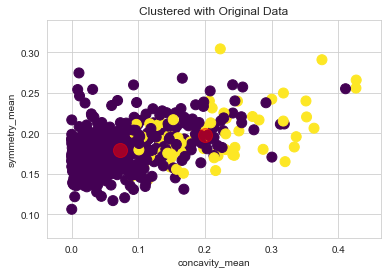

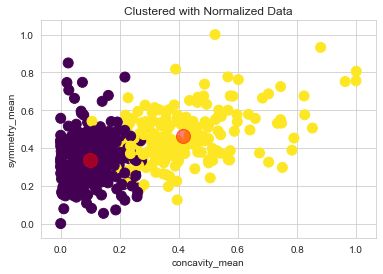

In [18]:
plt.scatter(OD["concavity_mean"], OD["symmetry_mean"], c=data["diagnosis"], s=100, cmap='viridis')
plt.title("Original Distribution")
plt.xlabel("conc_mean")
plt.ylabel("symm_mean")
plt.show()


plt.scatter(OD["concavity_mean"], OD["symmetry_mean"], c=labels, s=100, cmap='viridis')
plt.scatter(clusterCenters[:, 4], clusterCenters[:, 5], c='red', s=200, alpha=0.5)
plt.title("Clustered with Original Data")
plt.xlabel("concavity_mean")
plt.ylabel("symmetry_mean")
plt.show()

plt.scatter(ND["concavity_mean"], ND["symmetry_mean"], c=normalizedLabel, s=100, cmap='viridis')
plt.scatter(NclusterCenters[:, 4], NclusterCenters[:, 5], c='red', s=200, alpha=0.5)
plt.title("Clustered with Normalized Data")
plt.xlabel("concavity_mean")
plt.ylabel("symmetry_mean")
plt.show()


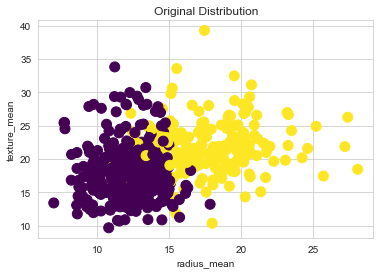

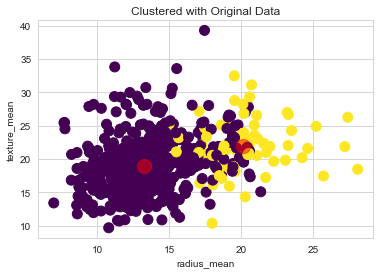

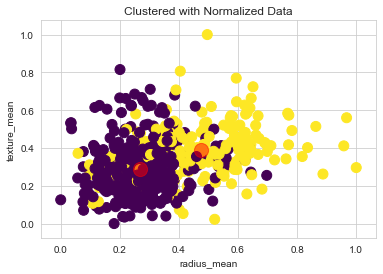

In [19]:
plt.scatter(OD.iloc[:, 0], OD.iloc[:, 1], c=data["diagnosis"], s=100, cmap='viridis')
plt.title("Original Distribution")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.show()


plt.scatter(OD.iloc[:, 0], OD.iloc[:, 1], c=labels, s=100, cmap='viridis')
plt.scatter(clusterCenters[:, 0], clusterCenters[:, 1], c='red', s=200, alpha=0.5)
plt.title("Clustered with Original Data")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.show()

plt.scatter(ND.iloc[:, 0], ND.iloc[:, 1], c=normalizedLabel, s=100, cmap='viridis')
plt.scatter(NclusterCenters[:, 0], NclusterCenters[:, 1], c='red', s=200, alpha=0.5)
plt.title("Clustered with Normalized Data")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.show()


# CLASSIFICATION
In the first part, we will use K-Nearest Neighbor Algorithm. We will classify the original data then we will use normalized data.

In [20]:
x = OD.values
y = data.iloc[:,0].values

In [21]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)
knn = KNeighborsClassifier(n_neighbors=4, metric='minkowski')

In [22]:
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[117   4]
 [ 13  54]]


We used minkowski, euclidean and cosine methods for metric in KNN algorithm. The best results were obtained from minkowski, the worst result was obtained by the cosine method.
We used 4 for the k value. (approximate square root of the number of columns we use)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       121
           1       0.93      0.81      0.86        67

    accuracy                           0.91       188
   macro avg       0.92      0.89      0.90       188
weighted avg       0.91      0.91      0.91       188



## Visualization of the Classification (with Original Data)
We have compared the original classes against results that we received in KNN Classification.
Since accuracy is 0.91, most of the values will be true.Graphs looks like similiar

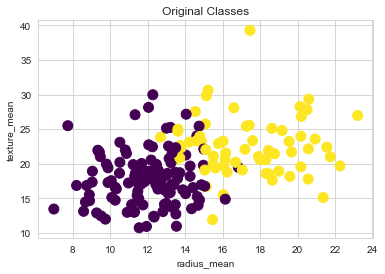

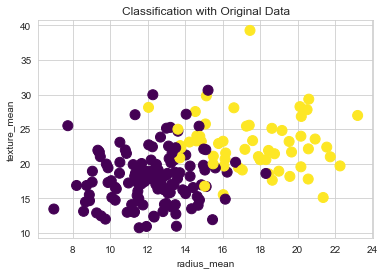

In [24]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=100, cmap='viridis')
plt.title("Original Classes")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.show()

plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred, s=100, cmap='viridis')
plt.title("Classification with Original Data")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.show()

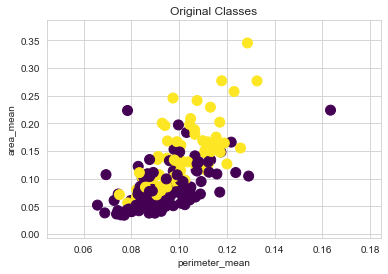

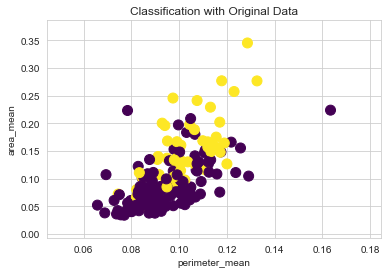

In [25]:
plt.scatter(x_test[:, 2], x_test[:, 3], c=y_test, s=100, cmap='viridis')
plt.title("Original Classes")
plt.xlabel("perimeter_mean")
plt.ylabel("area_mean")
plt.show()

plt.scatter(x_test[:, 2], x_test[:, 3], c=y_pred, s=100, cmap='viridis')
plt.title("Classification with Original Data")
plt.xlabel("perimeter_mean")
plt.ylabel("area_mean")
plt.show()

# Classification Part - 2 (Normalized Data)
Since we have already split our data above, we can normalize them.
We are going to use same algorithm to compare accuracy difference between the normalized data and original data

In [26]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [27]:
knn2 = KNeighborsClassifier(n_neighbors=4, metric='minkowski')
knn2.fit(x_train,y_train)
y_pred2 = knn2.predict(x_test)

In [28]:
cm2 = confusion_matrix(y_test,y_pred2)
print(cm2)

[[119   2]
 [  8  59]]


In [29]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       121
           1       0.97      0.88      0.92        67

    accuracy                           0.95       188
   macro avg       0.95      0.93      0.94       188
weighted avg       0.95      0.95      0.95       188



Accuracy(0.95) is little bit better than the classification with original data(0.91 see above).So, Normalization improved the accuracy of molecular classification for data with confounding handling effects. 

## Visualization of the Classification (with Normalized Data)

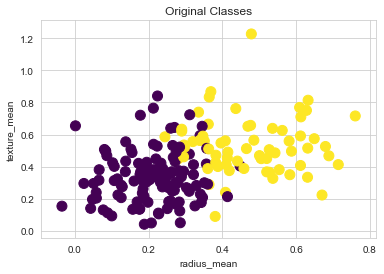

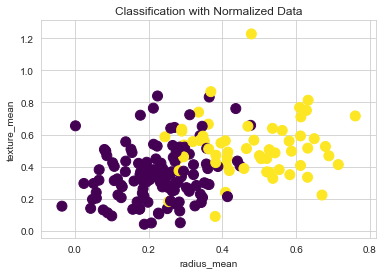

In [30]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=100, cmap='viridis')
plt.title("Original Classes")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.show()


plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred2, s=100, cmap='viridis')
plt.title("Classification with Normalized Data")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.show()

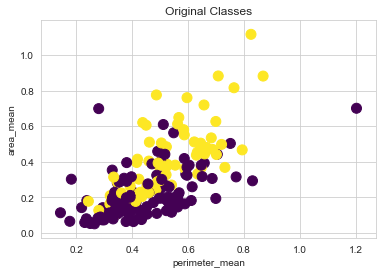

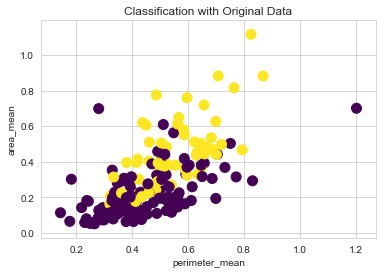

In [31]:
plt.scatter(x_test[:, 2], x_test[:, 3], c=y_test, s=100, cmap='viridis')
plt.title("Original Classes")
plt.xlabel("perimeter_mean")
plt.ylabel("area_mean")
plt.show()

plt.scatter(x_test[:, 2], x_test[:, 3], c=y_pred2, s=100, cmap='viridis')
plt.title("Classification with Normalized Data")
plt.xlabel("perimeter_mean")
plt.ylabel("area_mean")
plt.show()